In [7]:
conda env create -f environment.yml

2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done
Installing pip dependencies: | Ran pip subprocess with arguments:
['/home/thandar/miniconda3/envs/pds/bin/python', '-m', 'pip', 'install', '-U', '-r', '/home/thandar/5m-data-Coaching-DS3-25Oct/condaenv.73qoc98g.requirements.txt', '--exists-action=b']
Pip subprocess output:

done
#
# To activate this environment, use
#
#     $ conda activate pds
#
# To deactivate an active environment, use
#
#     $ conda deactivate


Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load dataset
vgsales = pd.read_csv("vgsales.csv")
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
vgsales.shape

(16598, 11)

In [13]:
# Group by Genre and sum up regional sales
genre_region = vgsales.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

In [14]:
# Normalize by region (each column sums to 100%)
genre_region_percent = genre_region.div(genre_region.sum(axis=0), axis=1) * 100

<Axes: ylabel='Genre'>

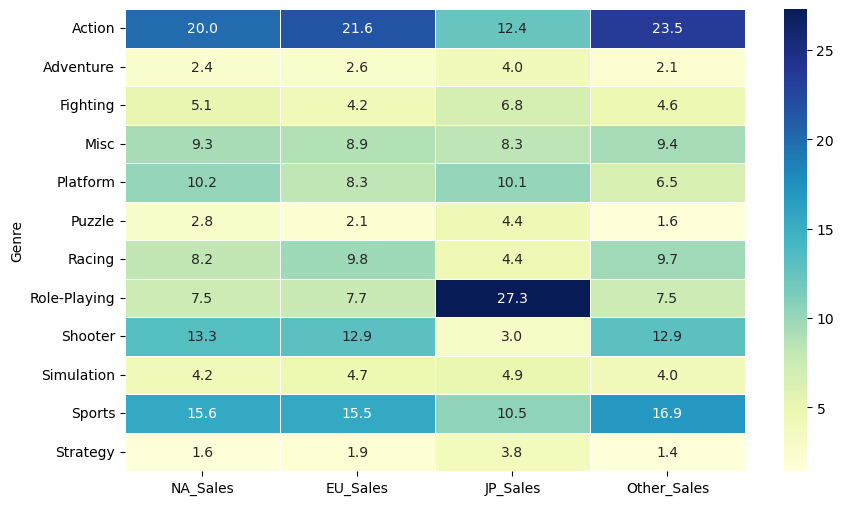

In [15]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    genre_region_percent,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=0.5
)

/tmp/ipykernel_30520/1856848520.py:5: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from current font.
  plt.tight_layout()
/home/thandar/miniconda3/envs/pds/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


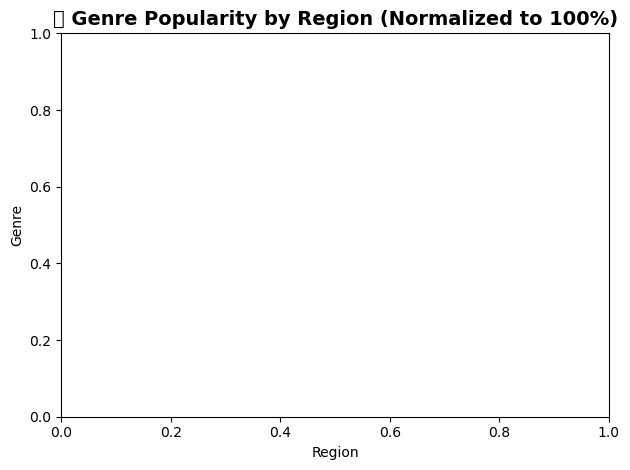

In [16]:
# Add titles and labels
plt.title("🎮 Genre Popularity by Region (Normalized to 100%)", fontsize=14, weight='bold')
plt.xlabel("Region")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()